In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel="linear", C=0.01).fit(X_train, y_train)

### Caculate Confusion Matrix without sklearn

In [2]:
y_score = classifier.decision_function(X_test) 
y_score = [np.argmax(i) for i in y_score]

conf_mtx = np.zeros((3,3))

for i in range(len(iris.target_names)):  
    for l in [y_score[j] for j, k in enumerate(y_test) if k==i]:
        conf_mtx[i][l]+=1 
        
conf_mtx

array([[13.,  0.,  0.],
       [ 0., 10.,  6.],
       [ 0.,  0.,  9.]])

### Stock function and plot

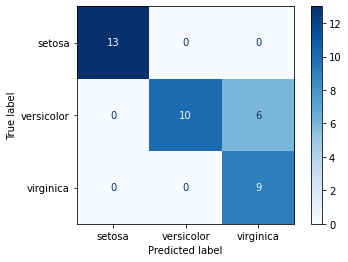

In [3]:
np.set_printoptions(precision=2)

disp = ConfusionMatrixDisplay.from_estimator(
    classifier,
    X_test,
    y_test,
    display_labels=class_names,
    cmap=plt.cm.Blues,
    normalize=None,
) 